### 1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import time
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df = df.merge(pd.DataFrame(data['target_names'], columns=['target_names']), left_on='target', right_index=True)
df = df[df.target != 0].reset_index(drop=True)
df.target = df.target - 1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,7.0,3.2,4.7,1.4,0,versicolor
1,6.4,3.2,4.5,1.5,0,versicolor
2,6.9,3.1,4.9,1.5,0,versicolor
3,5.5,2.3,4.0,1.3,0,versicolor
4,6.5,2.8,4.6,1.5,0,versicolor
...,...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1,virginica
96,6.3,2.5,5.0,1.9,1,virginica
97,6.5,3.0,5.2,2.0,1,virginica
98,6.2,3.4,5.4,2.3,1,virginica


In [3]:
features = np.array(df.iloc[:,:-2])
targets = np.array(df.iloc[:,-2])
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции.

In [4]:
def logistic_regression(features, weights):
    probabilities = 1 / (1 + np.e**-(weights[0] + features@weights[1:]))
    return probabilities

### 3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

$$Loss = -\sum_{i=1}^N y_i \cdot log(\frac{1}{1 + e^{-(w_0 + w_1{x_i}_1...)}}) + (1 - y_i)  \cdot log(1 - \frac{1}{1 + e^{-(w_0 + w_1{x_i}_1...)}}) $$

$$\frac{dLoss}{dw_0} = \frac{1}{1 + e^{-(w_0 + w_1x_1...)}} - y $$


$$\frac{dLoss}{dw_{1...n}} = (\frac{1}{1 + e^{-(w_0 + w_1x_1...)}} - y) \cdot x_{1...n}$$

In [5]:
def binary_cross_entropy(probabilities, targets):
    total_cost = np.log(probabilities)@targets + np.log(1 - probabilities)@(1 - targets)
    return float(-total_cost)

In [6]:
def der_w0(features, targets, weights):
    total_cost = 1 / (1 + np.e**-(weights[0] + features@weights[1:])) - targets
    return np.sum(total_cost) / len(targets)

In [7]:
def der_w(features, targets, weights, weight_no):
    total_cost = (1 / (1 + np.e**-(weights[0] + features@weights[1:])) - targets) @ features.T[weight_no-1]
    return np.sum(total_cost) / len(targets)

In [8]:
np.random.seed(1)
starting_weights = np.random.uniform(-1, 1, 5)

In [9]:
EPOCHS = 100
LEARNING_RATE = 0.1
w0, w1, w2, w3, w4 = starting_weights
weights = [w0, w1, w2, w3, w4]

losses_gd = []
probabilities_gd = logistic_regression(features, weights)
losses_gd.append(binary_cross_entropy(probabilities_gd, targets))

start_time = time.time()
for i in range(EPOCHS):
    
    w0 -= LEARNING_RATE * der_w0(features, targets, weights)
    w1 -= LEARNING_RATE * der_w(features, targets, weights, 1)
    w2 -= LEARNING_RATE * der_w(features, targets, weights, 2)
    w3 -= LEARNING_RATE * der_w(features, targets, weights, 3)
    w4 -= LEARNING_RATE * der_w(features, targets, weights, 4)
    
    weights = [w0, w1, w2, w3, w4]
    
    probabilities_gd = logistic_regression(features, weights)
    losses_gd.append(binary_cross_entropy(probabilities_gd, targets))

time_gd = time.time() - start_time

In [10]:
predictions_gd = [0 if i < 0.5 else 1 for i in probabilities_gd]
accuracy_score_gd = sum(predictions_gd == targets)/len(targets)

### 4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
![](https://tex.s2cms.ru/svg/%0AE%5Bg%5E2%5D_t%20%3D%20%5Cgamma%20E%5Bg%5E2%5D_%7Bt-1%7D%20%2B%20(1%20-%20%5Cgamma)%20g%5E2_t%0A)
![](https://tex.s2cms.ru/svg/%0A%5Ctheta_%7Bt%2B1%7D%20%3D%20%5Ctheta_%7Bt%7D%20-%20%5Cfrac%7B%5Ceta%7D%7B%5Csqrt%7BE%5Bg%5E2%5D_t%20%2B%20%5Cepsilon%7D%7D%20g_%7Bt%7D%0A)

In [11]:
EPOCHS = 100
LEARNING_RATE = 0.1
w0, w1, w2, w3, w4 = starting_weights
weights = [w0, w1, w2, w3, w4]

E0, E1, E2, E3, E4 = [0]*5
gamma = 0.9
epsilon = 10**-6

losses_rmsp = []
probabilities_rmsp = logistic_regression(features, weights)
losses_rmsp.append(binary_cross_entropy(probabilities_rmsp, targets))

start_time = time.time()
for i in range(EPOCHS):
    
    dw0 = der_w0(features, targets, weights)
    E0 = gamma*E0 + (1 - gamma)*dw0**2
    w0 -= LEARNING_RATE * dw0 / np.sqrt(E0 + epsilon)
    
    dw1 = der_w(features, targets, weights, 1)
    E1 = gamma*E1 + (1 - gamma)*dw1**2
    w1 -= LEARNING_RATE * dw1 / np.sqrt(E1 + epsilon)
    
    dw2 = der_w(features, targets, weights, 2)
    E2 = gamma*E2 + (1 - gamma)*dw2**2
    w2 -= LEARNING_RATE * dw2 / np.sqrt(E2 + epsilon)
    
    dw3 = der_w(features, targets, weights, 3)
    E3 = gamma*E3 + (1 - gamma)*dw3**2
    w3 -= LEARNING_RATE * dw3 / np.sqrt(E3 + epsilon)
    
    dw4 = der_w(features, targets, weights, 4)
    E4 = gamma*E4 + (1 - gamma)*dw4**2
    w4 -= LEARNING_RATE * dw4 / np.sqrt(E4 + epsilon)
    
    weights = [w0, w1, w2, w3, w4]
    
    probabilities_rmsp = logistic_regression(features, weights)
    losses_rmsp.append(binary_cross_entropy(probabilities_rmsp, targets))

time_rmsp = time.time() - start_time

In [12]:
predictions_rmsp = [0 if i < 0.5 else 1 for i in probabilities_rmsp]
accuracy_score_rmsp = sum(predictions_rmsp == targets)/len(targets)

### 5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
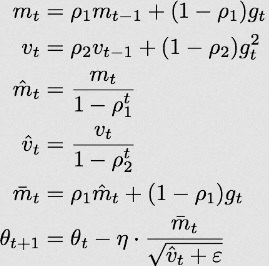

In [13]:
EPOCHS = 100
LEARNING_RATE = 0.1
w0, w1, w2, w3, w4 = starting_weights
weights = [w0, w1, w2, w3, w4]

m0, m1, m2, m3, m4 = [0]*5
v0, v1, v2, v3, v4 = [0]*5
rho1 = 0.9
rho2 = 0.999
epsilon = 10**-8

losses_nadam = []
probabilities_nadam = logistic_regression(features, weights)
losses_nadam.append(binary_cross_entropy(probabilities_nadam, targets))

start_time = time.time()
for i in range(EPOCHS):
    
    dw0 = der_w0(features, targets, weights)
    m0 = rho1*m0 + (1 - rho1)*dw0
    v0 = rho2*v0 + (1 - rho2)*dw0**2
    w0 -= LEARNING_RATE * (rho1*m0 / (1 - rho1**(i+1)) + (1 - rho1)*dw0) / np.sqrt(v0 / (1 - rho2**(i+1)) + epsilon)
    
    dw1 = der_w(features, targets, weights, 1)
    m1 = rho1*m1 + (1 - rho1)*dw1
    v1 = rho2*v1 + (1 - rho2)*dw1**2
    w1 -= LEARNING_RATE * (rho1*m1 / (1 - rho1**(i+1)) + (1 - rho1)*dw1) / np.sqrt(v1 / (1 - rho2**(i+1)) + epsilon)
    
    dw2 = der_w(features, targets, weights, 2)
    m2 = rho1*m2 + (1 - rho1)*dw2
    v2 = rho2*v2 + (1 - rho2)*dw2**2
    w2 -= LEARNING_RATE * (rho1*m2 / (1 - rho1**(i+1)) + (1 - rho1)*dw2) / np.sqrt(v2 / (1 - rho2**(i+1)) + epsilon)
    
    dw3 = der_w(features, targets, weights, 3)
    m3 = rho1*m3 + (1 - rho1)*dw3
    v3 = rho2*v3 + (1 - rho2)*dw3**2
    w3 -= LEARNING_RATE * (rho1*m3 / (1 - rho1**(i+1)) + (1 - rho1)*dw3) / np.sqrt(v3 / (1 - rho2**(i+1)) + epsilon)
    
    dw4 = der_w(features, targets, weights, 4)
    m4 = rho1*m4 + (1 - rho1)*dw4
    v4 = rho2*v4 + (1 - rho2)*dw4**2
    w4 -= LEARNING_RATE * (rho1*m4 / (1 - rho1**(i+1)) + (1 - rho1)*dw4) / np.sqrt(v4 / (1 - rho2**(i+1)) + epsilon)
    
    weights = [w0, w1, w2, w3, w4]
    
    probabilities_nadam = logistic_regression(features, weights)
    losses_nadam.append(binary_cross_entropy(probabilities_nadam, targets))

time_nadam = time.time() - start_time

In [14]:
predictions_nadam = [0 if i < 0.5 else 1 for i in probabilities_nadam]
accuracy_score_nadam = sum(predictions_nadam == targets)/len(targets)

### 6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [15]:
pd.DataFrame({'Метод': ['Gradient descent', 'Root Mean Square Propagation', 'Nesterov–accelerated Adaptive Moment Estimation'],
              'Доля точных предсказаний': [accuracy_score_gd, accuracy_score_rmsp, accuracy_score_nadam],
              'Потери после обучения': [losses_gd[-1], losses_rmsp[-1], losses_nadam[-1]],
              'Время работы': [time_gd, time_rmsp, time_nadam]})

,Метод,Доля точных предсказаний,Потери после обучения,Время работы
0,Gradient descent,0.93,47.911055,0.015903
1,Root Mean Square Propagation,0.83,41.075177,0.012258
2,Nesterov–accelerated Adaptive Moment Estimation,0.96,29.636760,0.012081


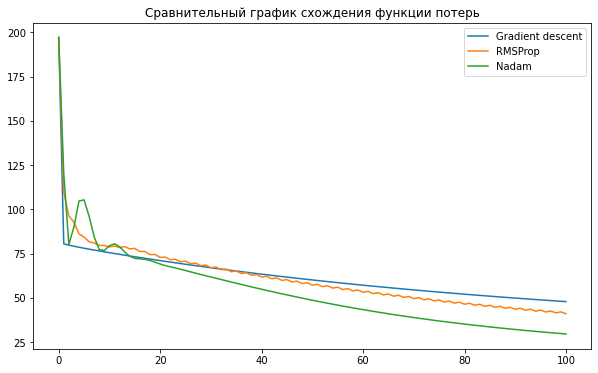

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses_gd)), losses_gd, label='Gradient descent')
plt.plot(range(len(losses_rmsp)), losses_rmsp, label='RMSProp')
plt.plot(range(len(losses_nadam)), losses_nadam, label='Nadam')
plt.legend()
plt.title('Сравнительный график схождения функции потерь')
plt.show()

### Выводы
Все три рассмотренных метода приводят к оптимизации функции потерь. Темп обучения `LEARNING_RATE = 0.1` и количество эпох `EPOCHS = 100` были выбраны одинаковыми для каждого эксперимента, чтобы произвести более наглядное сравнение.

Необходимо отметить, что специфика самого набора данных и его небольшой размер влияют на то, как показывает себя каждый из методов. Поэтому полученные выводы нельзя назвать обобщенными, так как для этого требуется произвести большое количество экспериментов на более объемном наборе данных.

1. В полученных мною результатах можно заметить, что функция потерь поначалу сходится быстрее всего методом обыкновенного градиентного спуска, однако затем темп ее схождения снижается относительно других методов. Это можно объяснить тем, что данный метод работает "без оглядки" на предыдущие шаги, в то время как RMSProp и Nadam учитывают направление предыдущего движения в алгоритме обновления параметров. Несмотря на это обычный градиентный спуск показал второй результат по точности предсказаний, опередив в этом RMSProp.
2. Метод RMSProp справляется лучше обычного градиентного спуска с оптимизацией функции потерь уже после примерно 30 итераций. Однако в этой серии экспериментов для рассматриваемого набора данных RMSProp показал наименьшую точность предсказаний. Получается, что меньшие потери не обязательно означают большую точность. Это можно объяснить тем, что RMSProp ошибался чаще градиентного спуска, но при этом выдавал большую уверенность для своих предсказаний. То есть определенные этим методом вероятности отнесения объекта к тому, или иному классу в среднем находились дальше от серединного значения 0.5, чем вероятности, полученные с помощью оптимизации обычным градиентным спуском. С увеличением количества эпох до 1000, RMSProp догоняет по точности градиентный спуск, при этом обеспечивая меньшие потери.
3. Схождение функции для метода Nadam на дистанции до 10 эпох выглядит несколько хаотичным, но затем быстро выравнивается и стабильно начинает показывать лучший результат по уровню потерь. На мой взгляд такое поведение можно объяснить большим количеством дополнительных параметров для этого метода. Вероятно, из-за этого алгоритму требуется чуть больше итераций, чтобы нащупать правильное направление движения. В результате, по прошествии 100 эпох именно Nadam обеспечил минимальный уровень потерь и наибольший процент точных предсказаний.